# WeatherPy

In [151]:
#Dependencies
import requests
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from citipy import citipy
# Import API key
from api_keys import weather_api_key

## Generate Cities List

The aim of this code was to create as much of an even distribution of cities across the globe as possible. The cities datalist is divided into 4 quadrants taking random latitudes and longitutes from the Northern, Southern, Eastern and Western hemispheres. Lists of 150 cities from each quadrant were generated separately. This was done as 90% of the worlds population and land mass exist in the Northern hemisphere so the likelyhood of generating unique Southern hemisphere cities in a single list using the citipy library is reduced.

In [74]:
#geographical coordinates divided into 4 sections to obtain most equal spread of cities, to make the citipy library work faster the latitudes have been capped at the northern and southern most cities in the world to prevent getting too much ocean or uninhabitated land 
lats = [(0,79),(0,79), (-54,0), (-54,0)]
longs = [(0,180),(-180,0),(0,180),(-180,0)]

In [89]:
#function to make lists of unique city/country combinations from above coordinates evenly split across each section
#np.random.uniform is used to ensure selection follows uniform distribution not normal distribution
def makelists(x,listname):
    while len(listname) < 150:
        lat = np.random.uniform(lats[x][0],lats[x][1])  
        lon = np.random.uniform(longs[x][0],longs[x][1])
        city = citipy.nearest_city(lat, lon).city_name
        country = citipy.nearest_city(lat, lon).country_code
        listname.append((city, country))
        listname = list(set(listname))
    return(listname)





[('bambous virieux', 'mu'),
 ('isangel', 'vu'),
 ('bur gabo', 'so'),
 ('nelson bay', 'au'),
 ('ijaki', 'ki'),
 ('kachikau', 'bw'),
 ('pringsewu', 'id'),
 ('ahipara', 'nz'),
 ('kroonstad', 'za'),
 ('kruisfontein', 'za'),
 ('pangkalanbuun', 'id'),
 ('bloemfontein', 'za'),
 ('albany', 'au'),
 ('vanimo', 'pg'),
 ('bluff', 'nz'),
 ('waitati', 'nz'),
 ('hobart', 'au'),
 ('ambon', 'id'),
 ('denpasar', 'id'),
 ('benguela', 'ao'),
 ('mareeba', 'au'),
 ('tsihombe', 'mg'),
 ('kroya', 'id'),
 ('quelimane', 'mz'),
 ('tual', 'id'),
 ('hithadhoo', 'mv'),
 ('sola', 'vu'),
 ('kununurra', 'au'),
 ('pontianak', 'id'),
 ('port lincoln', 'au'),
 ('meulaboh', 'id'),
 ('saint-philippe', 're'),
 ('angoram', 'pg'),
 ('cape town', 'za'),
 ('kabwe', 'zm'),
 ('jamestown', 'sh'),
 ('kisangani', 'cd'),
 ('taolanaro', 'mg'),
 ('ambilobe', 'mg'),
 ('toliary', 'mg'),
 ('luebo', 'cd'),
 ('tuatapere', 'nz'),
 ('port hedland', 'au'),
 ('goroka', 'pg'),
 ('lata', 'sb'),
 ('angoche', 'mz'),
 ('hervey bay', 'au'),
 ('karrat

In [90]:
#create 4 sets of cities using makelists function, to ensure as even a spread across sections as possible
cities = {}

for i in range(4):
    name = "city" +str(i)
    listn = []
    listn = makelists(i,listn)
    cities[name] = listn
    


## Perform API Calls
This requires user to provide own API key in api_keys.py

In [91]:
#API calls on each dictionary
print("Begining of Data Retrieval\n-----------------")
cities2 = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness =[]
wind = []
country = []
date = []
i = 1
j = 1
for key,values in cities.items():
    for city in values:

        url = f"http://api.openweathermap.org/data/2.5/weather?q={city[0]},{city[1]}&imperial&appid={weather_api_key}"  
        data = requests.get(url).json()
   
        try:

            lat.append(data["coord"]["lat"])
            lon.append(data["coord"]["lon"])
            maxtemp.append(data["main"]["temp_max"])
            humidity.append(data["main"]["humidity"])
            cloudiness.append(data["clouds"]["all"])
            wind.append(data["wind"]["speed"])
            country.append(data["sys"]["country"])
            date.append(data["dt"])
        except: 
            message = data["message"]
            print(f"{message.capitalize()}. Skipping...")     
        else:
            print(f"Processing Record {i} of Set {j} | {city[0]}")
            cities2.append(city[0])
            #cities2 = list(set(cities2))
            i +=1
    j +=1   
print("-----------------\nData Retrieval Complete \n-----------------")
#creates dictionary of weather data    
citiesdata = {
    'City': cities2,
    'Lat': lat, 
    'Lng': lon, 
    "Max Temp" : maxtemp, 
    "Humidity" : humidity, 
    "Cloudiness" : cloudiness, 
    "Wind Speed": wind, 
    "Country": country,
    "Date" : date
}


Begining of Data Retrieval
-----------------
Processing Record 1 of Set 1 | ('tulun', 'ru')
Processing Record 2 of Set 1 | ('baykit', 'ru')
Processing Record 3 of Set 1 | ('gaozhou', 'cn')
Processing Record 4 of Set 1 | ('koshki', 'ru')
Processing Record 5 of Set 1 | ('kaifeng', 'cn')
City not found. Skipping...
Processing Record 6 of Set 1 | ('khatanga', 'ru')
City not found. Skipping...
Processing Record 7 of Set 1 | ('kulhudhuffushi', 'mv')
Processing Record 8 of Set 1 | ('wichian buri', 'th')
Processing Record 9 of Set 1 | ('safaga', 'eg')
Processing Record 10 of Set 1 | ('valreas', 'fr')
Processing Record 11 of Set 1 | ('suraabad', 'az')
City not found. Skipping...
Processing Record 12 of Set 1 | ('akdepe', 'tm')
Processing Record 13 of Set 1 | ('zonguldak', 'tr')
Processing Record 14 of Set 1 | ('meulaboh', 'id')
Processing Record 15 of Set 1 | ('muroto', 'jp')
Processing Record 16 of Set 1 | ('wuzhou', 'cn')
Processing Record 17 of Set 1 | ('lorengau', 'pg')
City not found. Skip

Processing Record 151 of Set 2 | ('torbay', 'ca')
Processing Record 152 of Set 2 | ('lavrentiya', 'ru')
Processing Record 153 of Set 2 | ('ponta do sol', 'cv')
Processing Record 154 of Set 2 | ('corinth', 'us')
Processing Record 155 of Set 2 | ('stornoway', 'gb')
Processing Record 156 of Set 2 | ('carrizal', 've')
Processing Record 157 of Set 2 | ('mayo', 'ca')
Processing Record 158 of Set 2 | ('cayenne', 'gf')
Processing Record 159 of Set 2 | ('bathsheba', 'bb')
Processing Record 160 of Set 2 | ('westport', 'ie')
Processing Record 161 of Set 2 | ('red deer', 'ca')
Processing Record 162 of Set 2 | ('youghal', 'ie')
Processing Record 163 of Set 2 | ('nouakchott', 'mr')
Processing Record 164 of Set 2 | ('saint-pierre', 'pm')
Processing Record 165 of Set 2 | ('kilrush', 'ie')
Processing Record 166 of Set 2 | ('sumter', 'us')
Processing Record 167 of Set 2 | ('pangnirtung', 'ca')
Processing Record 168 of Set 2 | ('la marque', 'us')
Processing Record 169 of Set 2 | ('san patricio', 'mx')
Pr

Processing Record 297 of Set 3 | ('tuatapere', 'nz')
Processing Record 298 of Set 3 | ('pemba', 'mz')
Processing Record 299 of Set 3 | ('new norfolk', 'au')
Processing Record 300 of Set 3 | ('port hedland', 'au')
City not found. Skipping...
Processing Record 301 of Set 3 | ('sorong', 'id')
Processing Record 302 of Set 3 | ('port shepstone', 'za')
Processing Record 303 of Set 3 | ('inverell', 'au')
Processing Record 304 of Set 3 | ('broken hill', 'au')
Processing Record 305 of Set 3 | ('chibuto', 'mz')
Processing Record 306 of Set 3 | ('port keats', 'au')
Processing Record 307 of Set 3 | ('magole', 'tz')
Processing Record 308 of Set 3 | ('hervey bay', 'au')
Processing Record 309 of Set 3 | ('karratha', 'au')
Processing Record 310 of Set 3 | ('busselton', 'au')
Processing Record 311 of Set 3 | ('flinders', 'au')
City not found. Skipping...
City not found. Skipping...
Processing Record 312 of Set 3 | ('oranjemund', 'na')
Processing Record 313 of Set 3 | ('bengkulu', 'id')
Processing Recor

Processing Record 446 of Set 4 | ('illapel', 'cl')
Processing Record 447 of Set 4 | ('haapiti', 'pf')
Processing Record 448 of Set 4 | ('unai', 'br')
Processing Record 449 of Set 4 | ('puerto narino', 'co')
Processing Record 450 of Set 4 | ('vaini', 'to')
Processing Record 451 of Set 4 | ('oyon', 'pe')
Processing Record 452 of Set 4 | ('touros', 'br')
Processing Record 453 of Set 4 | ('san cristobal', 'ec')
Processing Record 454 of Set 4 | ('arraial do cabo', 'br')
Processing Record 455 of Set 4 | ('sao felix do xingu', 'br')
Processing Record 456 of Set 4 | ('huarmey', 'pe')
Processing Record 457 of Set 4 | ('chivilcoy', 'ar')
Processing Record 458 of Set 4 | ('itacoatiara', 'br')
City not found. Skipping...
Processing Record 459 of Set 4 | ('la rioja', 'ar')
Processing Record 460 of Set 4 | ('avarua', 'ck')
Processing Record 461 of Set 4 | ('maldonado', 'uy')
Processing Record 462 of Set 4 | ('saldanha', 'za')
Processing Record 463 of Set 4 | ('dois riachos', 'br')
Processing Record 

## Converts API Data to DataFrame
   


[274.01,
 271.4,
 295.5,
 284.22,
 296.15,
 258.66,
 301.94,
 305.93,
 296.15,
 280.93,
 290.15,
 298.15,
 283.15,
 303.11,
 289.15,
 293.61,
 302.2,
 274.82,
 281.15,
 295.88,
 281.58,
 295.2,
 301.9,
 292.22,
 302.15,
 276.15,
 271.99,
 298.15,
 296.08,
 300.15,
 301.9,
 277.5,
 295.79,
 267.77,
 277.7,
 299.15,
 275.33,
 301.03,
 299.3,
 303.35,
 294.25,
 263.15,
 306.1,
 290.16,
 303.75,
 287.82,
 280.02,
 274.98,
 301.04,
 262.45,
 306.15,
 288.15,
 266.92,
 301.62,
 278.71,
 287.47,
 290.15,
 292.68,
 305.93,
 277.67,
 290.15,
 275.36,
 300.79,
 289.52,
 273.28,
 296.4,
 274.26,
 304.15,
 278.15,
 280.3,
 302.12,
 279.82,
 301.8,
 279.55,
 284.38,
 301.95,
 297.84,
 294.15,
 273.32,
 289.15,
 280.55,
 275.47,
 279.04,
 282.07,
 288.87,
 275.48,
 289.31,
 283.35,
 279.04,
 298.16,
 303.01,
 283.64,
 296.55,
 279.15,
 255.59,
 300.27,
 281.15,
 308.89,
 280.37,
 311.48,
 304.7,
 293.15,
 276.15,
 294.15,
 280.15,
 299.69,
 257.21,
 263.27,
 300.43,
 297.41,
 301.43,
 294.09,
 301.5

In [110]:
#converts weather dictionary to dataframe removing duplicated city and country pairs
df1 = pd.DataFrame(citiesdata)
initial = len(df1)
df1.drop_duplicates(subset=['City','Country'], keep= 'first', inplace=True)
final = len(df1)

print(f"{initial - final} duplicate city/country pairs were removed")


8 duplicate city/country pairs were removed


In [140]:
#display data frame head
df1.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,"(tulun, ru)",54.5611,100.5792,274.01,42,58,4.17,RU,1618724037
1,"(baykit, ru)",61.6700,96.3700,271.40,71,100,4.86,RU,1618724038
2,"(gaozhou, cn)",21.9392,110.8461,295.50,82,98,3.79,CN,1618724038
3,"(koshki, ru)",54.2091,50.4677,284.22,42,1,5.76,RU,1618724038
4,"(kaifeng, cn)",34.7911,114.3483,296.15,23,0,4.00,CN,1618723521


In [154]:
#calculate and display summary statistic
df1.describe().style.format({'Lat':'{:.2f}','Lng':'{:.2f}','Max Temp':'{:.2f}','Humidity':'{:.2f}','Cloudiness':'{:.2f}', 'Wind Speed':'{:.2f}' ,'Date':"{:.0f}"})


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,531.00,531.00,531.00,531.00,531.00,531.00,531
mean,7.74,5.42,290.82,71.81,55.34,3.30,1618724073
std,32.74,90.08,10.40,21.75,38.78,2.29,82
min,-53.15,-175.20,251.82,3.00,0.00,0.12,1618723457
25%,-19.00,-68.42,284.20,62.00,18.00,1.54,1618724062
50%,-0.74,-1.76,293.27,76.00,66.00,2.68,1618724086
75%,35.98,77.53,298.15,88.00,92.00,4.63,1618724118
max,78.22,179.32,311.48,100.00,100.00,12.43,1618724144


TypeError: 'Styler' object is not subscriptable

 ## Inspects and removes data if humidity is over 100%

In [105]:
#cleans data if humidity is greater than 100%
if df1["Humidity"].max() > 100:
    over100 = (df1[df1["Humidity"]>100]).index
    clean_city_data = df1.drop(over100, inplace = False)
    droppedcities = df1.loc[over100]["City"]
    print(", ".join(droppedcities) + " have been removed as humidity was >100%")
else:
    clean_city_data = df1

#save to csv    
clean_city_data.to_csv("cityweatherdata.csv", encoding = "utf-8", index=False)

## Plotting Data

In [165]:
#gets date of data
date = datetime.fromtimestamp(clean_city_data["Date"].max()).strftime("%d/%m/%y")
date

'18/04/21'

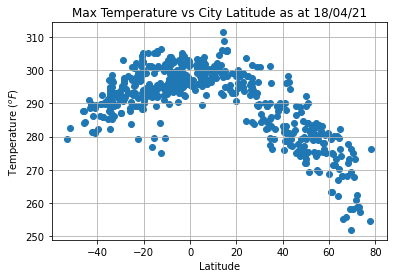

In [170]:
# Temp vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")
plt.title(f"Max Temperature vs City Latitude as at {date}")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevCitiesLatitude.png")

# Show plot
plt.show()


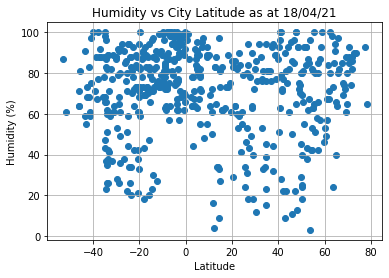

In [172]:
# Humidity vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")
plt.title(f"Humidity vs City Latitude as at {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvCitiesLatitude.png")

# Show plot
plt.show()

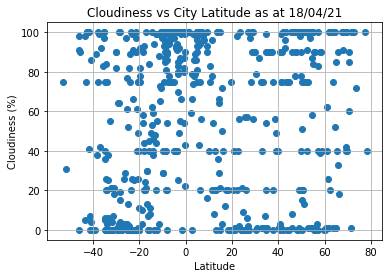

In [173]:
# Cloudiness vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")
plt.title(f"Cloudiness vs City Latitude as at {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessvCitiesLatitude.png")

# Show plot
plt.show()

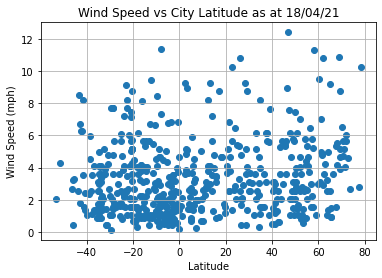

In [174]:
# Wind Speed vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")
plt.title(f"Wind Speed vs City Latitude as at {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedvCitiesLatitude.png")

# Show plot
plt.show()

## Linear Regressions

In [106]:
#divides dataframes into northern and southern hemisphere cities
northerncities = clean_city_data[clean_city_data["Lat"] >= 0]
southerncities = clean_city_data[clean_city_data["Lat"] < 0]

In [107]:
#shows even distribution of cities in each hemisphere
print(f"Number of cities in Northern Hemisphere dataset: {len(northerncities)}\nNumber of cities in Southern Hemisphere dataset: {len(southerncities)}")

Number of cities in Northern Hemisphere dataset: 259
Number of cities in Southern Hemisphere dataset: 272


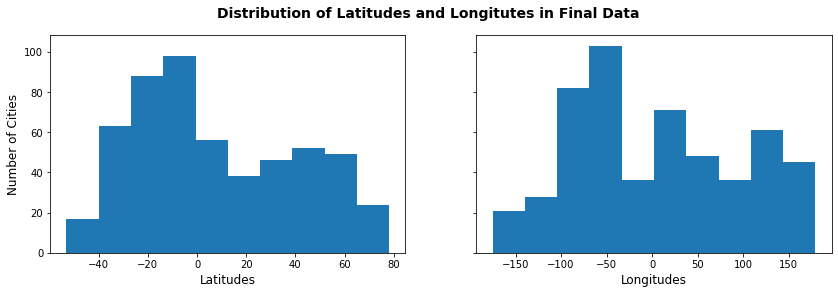

In [139]:
fig, axs = plt.subplots(1,2, sharey = True, figsize =(14,4))
fig.suptitle("Distribution of Latitudes and Longitutes in Final Data", fontsize=14, fontweight="bold")
axs[0].hist(clean_city_data['Lat'])
axs[0].set_xlabel("Latitudes",fontsize=12)
axs[0].set_ylabel("Number of Cities",fontsize=12)
axs[1].hist(clean_city_data['Lng'])
axs[1].set_xlabel("Longitudes",fontsize=12)

plt.show()


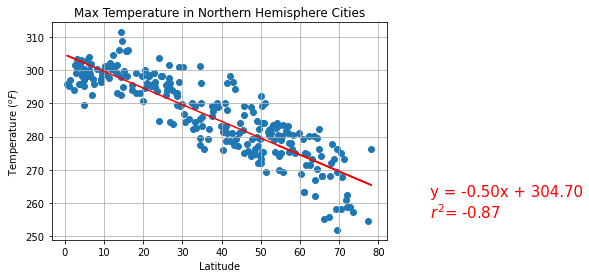

In [178]:
# Linear regression for Northern Hemisphere cities temperature vs latitude
northlat = northerncities['Lat']
northtemp = northerncities['Max Temp']
(ntslope, ntintercept, ntrvalue, ntpvalue, ntstderr) = stats.linregress(northlat, northtemp)
northtempregress = northlat * ntslope + ntintercept
ntline = f"y = {ntslope:.2f}x + {ntintercept:.2f}\n$r^{2}$= {ntrvalue:.2f}" 
plt.scatter(northlat,northtemp)
plt.plot(northlat,northtempregress,"r-")
plt.figtext(1,0.2,ntline,fontsize=15,color="red")
plt.title("Max Temperature in Northern Hemisphere Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthTempvLatRegression.png")
#show plot
plt.show()

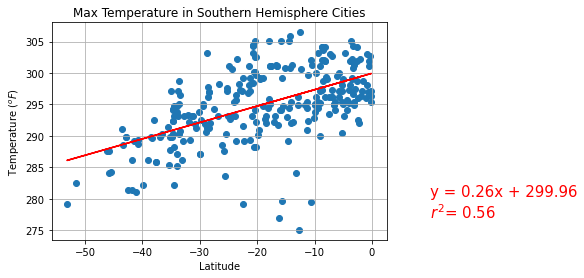

In [179]:
# Linear regression for Southern Hemisphere cities temperature vs latitude
southlat = southerncities['Lat']
southtemp = southerncities['Max Temp']
(stslope, stintercept, strvalue, stpvalue, ststderr) = stats.linregress(southlat, southtemp)
southtempregress = southlat * stslope + stintercept
stline = f"y = {stslope:.2f}x + {stintercept:.2f}\n$r^{2}$= {strvalue:.2f}" 
plt.scatter(southlat,southtemp)
plt.plot(southlat,southtempregress,"r-")
plt.figtext(1,0.2,stline,fontsize=15,color="red")
plt.title("Max Temperature in Southern Hemisphere Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthTempvLatRegression.png")
#show plot
plt.show()

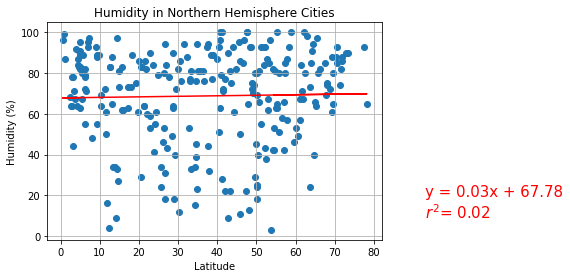

In [181]:
# Linear regression for Northern Hemisphere cities humidity vs latitude
northlat = northerncities['Lat']
northhum = northerncities['Humidity']
(nhslope, nhintercept, nhrvalue, nhpvalue, nhstderr) = stats.linregress(northlat, northhum)
northhumregress = northlat * nhslope + nhintercept
nhline = f"y = {nhslope:.2f}x + {nhintercept:.2f}\n$r^{2}$= {nhrvalue:.2f}" 
plt.scatter(northlat,northhum)
plt.plot(northlat,northhumregress,"r-")
plt.figtext(1,0.2,nhline,fontsize=15,color="red")
plt.title("Humidity in Northern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthHumidvLatRegression.png")
#show plot
plt.show()

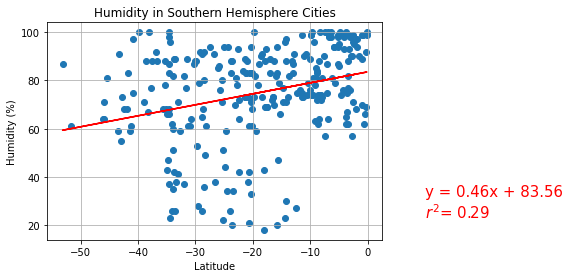

In [182]:
# Linear regression for Southern Hemisphere cities humidity vs latitude
southlat = southerncities['Lat']
southhum = southerncities['Humidity']
(shslope, shintercept, shrvalue, shpvalue, shstderr) = stats.linregress(southlat, southhum)
sorthhumregress = southlat * shslope + shintercept
shline = f"y = {shslope:.2f}x + {shintercept:.2f}\n$r^{2}$= {shrvalue:.2f}" 
plt.scatter(southlat,southhum)
plt.plot(southlat,sorthhumregress,"r-")
plt.figtext(1,0.2,shline,fontsize=15,color="red")
plt.title("Humidity in Southern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthHumidvLatRegression.png")
#show plot
plt.show()

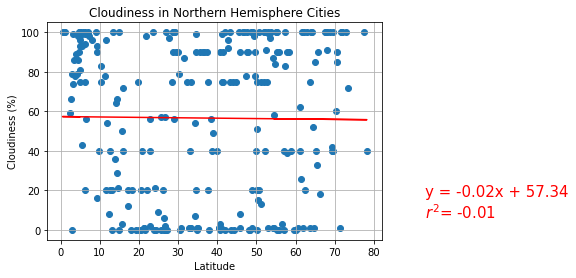

In [183]:
# Linear regression for Northern Hemisphere cities cloudiness vs latitude
northlat = northerncities['Lat']
northcloud = northerncities['Cloudiness']
(ncslope, ncintercept, ncrvalue, ncpvalue, ncstderr) = stats.linregress(northlat, northcloud)
northcloudregress = northlat * ncslope + ncintercept
ncline = f"y = {ncslope:.2f}x + {ncintercept:.2f}\n$r^{2}$= {ncrvalue:.2f}" 
plt.scatter(northlat,northcloud)
plt.plot(northlat,northcloudregress,"r-")
plt.figtext(1,0.2,ncline,fontsize=15,color="red")
plt.title("Cloudiness in Northern Hemisphere Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthCloudvLatRegression.png")
#show plot
plt.show()

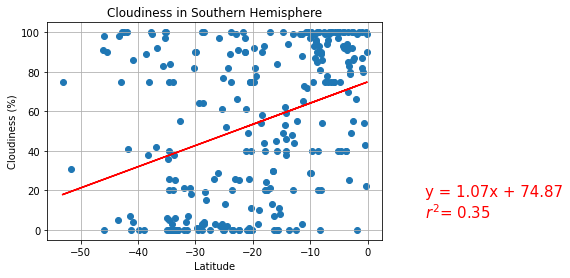

In [184]:
# Linear regression for Southern Hemisphere cities cloudiness vs latitude
southlat = southerncities['Lat']
southcloud = southerncities['Cloudiness']
(scslope, scintercept, scrvalue, scpvalue, scstderr) = stats.linregress(southlat, southcloud)
sorthcloudregress = southlat * scslope + scintercept
scline = f"y = {scslope:.2f}x + {scintercept:.2f}\n$r^{2}$= {scrvalue:.2f}" 
plt.scatter(southlat,southcloud)
plt.plot(southlat,sorthcloudregress,"r-")
plt.figtext(1,0.2,scline,fontsize=15,color="red")
plt.title("Cloudiness in Southern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthCloudvLatRegression.png")
#show plot
plt.show()

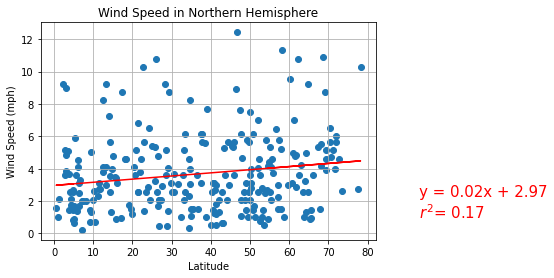

In [185]:
# Linear regression for Northern Hemisphere cities wind speed vs latitude
northlat = northerncities['Lat']
northwind = northerncities['Wind Speed']
(nwslope, nwintercept, nwrvalue, nwpvalue, nwstderr) = stats.linregress(northlat, northwind)
northwindregress = northlat * nwslope + nwintercept
nwline = f"y = {nwslope:.2f}x + {nwintercept:.2f}\n$r^{2}$= {nwrvalue:.2f}" 
plt.scatter(northlat,northwind)
plt.plot(northlat,northwindregress,"r-")
plt.figtext(1,0.2,nwline,fontsize=15,color="red")
plt.title("Wind Speed in Northern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthWindvLatRegression.png")
#show plot
plt.show()

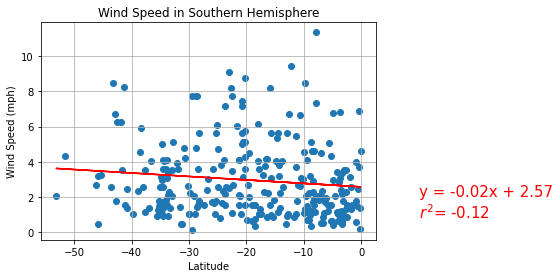

In [186]:
# Linear regression for Southern Hemisphere cities wind speed vs latitude
southlat = southerncities['Lat']
southwind = southerncities['Wind Speed']
(swslope, swintercept, swrvalue, swpvalue, swstderr) = stats.linregress(southlat, southwind)
sorthwindregress = southlat * swslope + swintercept
swline = f"y = {swslope:.2f}x + {swintercept:.2f}\n$r^{2}$= {swrvalue:.2f}" 
plt.scatter(southlat,southwind)
plt.plot(southlat,sorthwindregress,"r-")
plt.figtext(1,0.2,swline,fontsize=15,color="red")
plt.title("Wind Speed in Southern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthWindvLatRegression.png")
#show plot
plt.show()